In [1]:
from collections import Counter
from matplotlib import pyplot as plt
import pandas as pd

In [2]:
# Import the Data for Analysis
df = pd.read_csv(r"C:/Users/Dell/Desktop/Data-Analysis-Journey/Projects/StackOverflow-2025-Analysis/Data/survey_results_public.csv")
schema_df = pd.read_csv(r"C:/Users/Dell/Desktop/Data-Analysis-Journey/Projects/StackOverflow-2025-Analysis/Data/survey_results_schema.csv")

In [3]:
# Set max rows and Columns to see our data 
pd.set_option('display.max_rows',139)
pd.set_option('display.max_columns',139)

In [4]:
df.head(1)

,ResponseId,MainBranch,Age,EdLevel,Employment,EmploymentAddl,WorkExp,LearnCodeChoose,LearnCode,LearnCodeAI,AILearnHow,YearsCode,DevType,OrgSize,ICorPM,RemoteWork,PurchaseInfluence,TechEndorseIntro,TechEndorse_1,TechEndorse_2,TechEndorse_3,TechEndorse_4,TechEndorse_5,TechEndorse_6,TechEndorse_7,TechEndorse_8,TechEndorse_9,TechEndorse_13,TechEndorse_13_TEXT,TechOppose_1,TechOppose_2,TechOppose_3,TechOppose_5,TechOppose_7,TechOppose_9,TechOppose_11,TechOppose_13,TechOppose_16,TechOppose_15,TechOppose_15_TEXT,Industry,JobSatPoints_1,JobSatPoints_4,JobSatPoints_5,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,JobSatPoints_13,JobSatPoints_14,JobSatPoints_15,JobSatPoints_16,JobSatPoints_15_TEXT,AIThreat,NewRole,ToolCountWork,ToolCountPersonal,Country,Currency,CompTotal,LanguageChoice,LanguageHaveWorkedWith,LanguageWantToWorkWith,LanguageAdmired,LanguagesHaveEntry,LanguagesWantEntry,DatabaseChoice,...,OfficeStackAsyncAdmired,OfficeStackHaveEntry,OfficeStackWantEntry,CommPlatformHaveWorkedWith,CommPlatformWantToWorkWith,CommPlatformAdmired,CommPlatformHaveEntr,CommPlatformWantEntr,AIModelsChoice,AIModelsHaveWorkedWith,AIModelsWantToWorkWith,AIModelsAdmired,AIModelsHaveEntry,AIModelsWantEntry,SOAccount,SOVisitFreq,SODuration,SOPartFreq,SO_Dev_Content,SO_Actions_1,SO_Actions_16,SO_Actions_3,SO_Actions_4,SO_Actions_5,SO_Actions_6,SO_Actions_9,SO_Actions_7,SO_Actions_10,SO_Actions_15,SO_Actions_15_TEXT,SOComm,SOFriction,AISelect,AISent,AIAcc,AIComplex,AIToolCurrently partially AI,AIToolDon't plan to use AI for this task,AIToolPlan to partially use AI,AIToolPlan to mostly use AI,AIToolCurrently mostly AI,AIFrustration,AIExplain,AIAgents,AIAgentChange,AIAgent_Uses,AgentUsesGeneral,AIAgentImpactSomewhat agree,AIAgentImpactNeutral,AIAgentImpactSomewhat disagree,AIAgentImpactStrongly agree,AIAgentImpactStrongly disagree,AIAgentChallengesNeutral,AIAgentChallengesSomewhat disagree,AIAgentChallengesStrongly agree,AIAgentChallengesSomewhat agree,AIAgentChallengesStrongly disagree,AIAgentKnowledge,AIAgentKnowWrite,AIAgentOrchestration,AIAgentOrchWrite,AIAgentObserveSecure,AIAgentObsWrite,AIAgentExternal,AIAgentExtWrite,AIHuman,AIOpen,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,25-34 years old,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Employed,"Caring for dependents (children, elderly, etc.)",8.0,"Yes, I am not new to coding but am learning ne...",Online Courses or Certification (includes all ...,"Yes, I learned how to use AI-enabled tools for...",AI CodeGen tools or AI-enabled apps,14.0,"Developer, mobile",20 to 99 employees,People manager,Remote,"Yes, I influenced the purchase of a substantia...",Work,10.0,7.0,9.0,6.0,3.0,11.0,12.0,1.0,8.0,14.0,NaN,15.0,7.0,8.0,12.0,11.0,1.0,6.0,13.0,3.0,16.0,NaN,Fintech,3.0,9.0,5.0,10.0,12.0,11.0,2.0,6.0,7.0,13.0,14.0,15.0,8.0,NaN,I'm not sure,I have neither consider or transitioned into a...,7.0,3.0,Ukraine,EUR European Euro,52800.0,Yes,Bash/Shell (all shells);Dart;SQL,Dart,Dart,NaN,NaN,Yes,...,Markdown File,NaN,NaN,"Stack Overflow;Reddit;GitHub (public projects,...",NaN,NaN,NaN,NaN,Yes,openAI GPT (chatbot models);openAI Image gener...,NaN,NaN,NaN,NaN,Yes,A few times per week,Between 5 and 10 years,I have never participated in Q&A on Stack Over...,NaN,1.0,NaN,6.0,2.0,3.0,7.0,8.0,9.0,11.0,15.0,NaN,Neutral,"Rarely, almost never","Yes, I use AI tools monthly or infrequently",Indifferent,Neither trust nor distrust,Bad at handling complex tasks,Learning about a codebase;Writing code;Search ...,Project planning;Deployment and monitoring;Lea...,Documenting code;Debugging or fixing code;Test...,NaN,NaN,"AI solutions that are almost right, but not quite",No,"Yes, I use AI agents at work monthly or infreq...",Not at all or minimally,Software engineering,NaN,AI agents have increased my productivity.;AI a...,AI agents have helped me automate repetitive t...,NaN,NaN,NaN,I am concerned about the accuracy of the infor...,Integrating AI agents with my existin

In [5]:
schema_df.head(1)

,qid,qname,question,type,sub,sq_id
0,QID18,TechEndorse_1,What attracts you to a technology or causes yo...,RO,AI integration or AI Agent capabilities,1.0


In [6]:
df.info()
schema_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49123 entries, 0 to 49122
Columns: 170 entries, ResponseId to JobSat
dtypes: float64(50), int64(1), object(119)
memory usage: 63.7+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 139 entries, 0 to 138
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   qid       139 non-null    object 
 1   qname     139 non-null    object 
 2   question  139 non-null    object 
 3   type      139 non-null    object 
 4   sub       49 non-null     object 
 5   sq_id     49 non-null     float64
dtypes: float64(1), object(5)
memory usage: 6.6+ KB


In [7]:
df.shape

(49123, 170)

In [8]:
schema_df.shape

(139, 6)

In [9]:
schema_df.set_index('qname',inplace = True)

In [10]:
schema_df.loc['Age','question']

'What is your age?'

In [11]:
schema_df.index

Index(['TechEndorse_1', 'TechEndorse_2', 'TechEndorse_3', 'TechEndorse_4',
       'TechEndorse_5', 'TechEndorse_6', 'TechEndorse_7', 'TechEndorse_8',
       'TechEndorse_9', 'TechEndorse_13',
       ...
       'AIAgentKnowledge', 'AIAgentKnowWrite', 'AIAgentOrchestration',
       'AIAgentOrchWrite', 'AIAgentObserveSecure', 'AIAgentObsWrite',
       'AIAgentExternal', 'AIAgentExtWrite', 'AIHuman', 'AIOpen'],
      dtype='object', name='qname', length=139)

In [12]:
country = df['Country'].value_counts()
print(country)

Country
United States of America                                7226
Germany                                                 3022
India                                                   2542
United Kingdom of Great Britain and Northern Ireland    2038
France                                                  1409
                                                        ... 
Lesotho                                                    1
Djibouti                                                   1
Cape Verde                                                 1
Palau                                                      1
Guinea                                                     1
Name: count, Length: 177, dtype: int64


In [13]:
# Count the country for the visualization 
country_df = df['Country'].dropna()
# country_df
country_counter = Counter()
Country_N = []
Country_Count = []
for item in country_df:
    country_counter.update([item])
# print(country_counter.most_common(15))
for item in country_counter.most_common(15):
    Country_N.append(item[0])
    Country_Count.append(item[1])

In [14]:
print(Country_N)
print(Country_Count)

['United States of America', 'Germany', 'India', 'United Kingdom of Great Britain and Northern Ireland', 'France', 'Canada', 'Ukraine', 'Poland', 'Netherlands', 'Italy', 'Brazil', 'Australia', 'Spain', 'Sweden', 'Switzerland']
[7226, 3022, 2542, 2038, 1409, 1303, 964, 887, 867, 834, 824, 803, 717, 616, 546]


In [15]:
Country_N.reverse()
Country_Count.reverse()

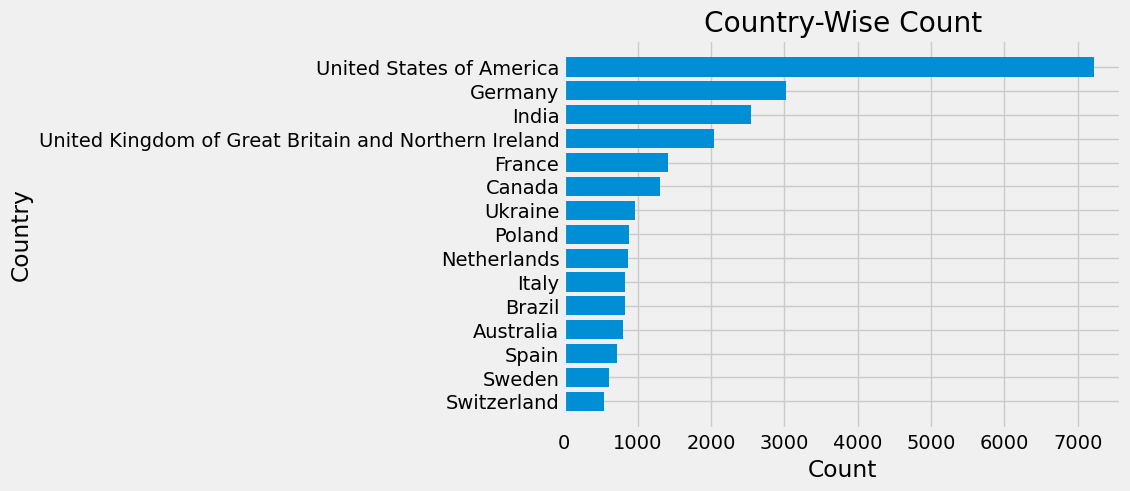

In [16]:
# Plottinh the horizontal bar graph,showing the top country response of the survey
plt.style.use("fivethirtyeight")
plt.barh(Country_N,Country_Count)
plt.xlabel("Count")
plt.ylabel("Country")
plt.title("Country-Wise Count")
plt.savefig('Country_wise_Count.png')
plt.show()